In [1]:
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

df = normalize_feature(pd.read_csv('data.csv',names=['square','bedrooms','price']))

ones = pd.DataFrame({'ones':np.ones(len(df))}) #ones是n行1列的数据框，表示x0恒威1
df = pd.concat([ones,df],axis=1) #根据列合并数据
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


# 数据处理：获取X和y

In [2]:
X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


# 创建线性回归模型（数据流图）

In [3]:
import tensorflow as tf

alpha = 0.01 # 学习率alpha
epoch = 500 # 训练全量数据集的轮数

# 输入X，形状（47，3）
X = tf.placeholder(tf.float32,X_data.shape)
# 输出y，形状（47，1）
y = tf.placeholder(tf.float32,y_data.shape)

# 权重变量w，形状（3，1）
W = tf.get_variable("weights",(X_data.shape[1],1),initializer=tf.constant_initializer())
# 假设函数h(x) = w0*x0 + w1*x1 + w2*x2 ,其中x0恒为1
# 推理值 y_pred 形状（47，1）
y_pred = tf.matmul(X,W)

# 损失函数采用最小二乘法，y_pred-y是形如[47，1]的向量。
# tf.matmul(a,b,transpose_a=True)表示∶矩阵a的转置乘矩阵b，即[1,47] X[47,1]
# 损失函数操作loss
loss_op = 1/(2*len(X_data))*tf.matmul((y_pred-y),(y_pred-y),transpose_a=True)
# 随机梯度下降优化器opt
opt = tf.train.GradientDescentOptimizer(learning_rate = alpha)
# 单论训练操作 train_op
train_op = opt.minimize(loss_op)

# 创建会话（运行环境）

In [5]:
with tf.Session() as sess:
    #初始化全局变量
    sess.run(tf.global_variables_initializer())
    # 创建FileWriter实例，并传入当前会话加载的数据流图
    writer = tf.summary.FileWriter('./summary/linear-regression-2',sess.graph)
    # 记录所有损失值
    loss_data=[]
    # 开始训练模型
    # 因为训练集较小，所以采用批梯度下降优化算法，每次都使用全量数据训练
    for e in range(1,epoch+1):
        _,loss,w = sess.run([train_op,loss_op,W],feed_dict={X:X_data,y:y_data})
        # 记录每一轮损失值变化情况
        loss_data.append(float(loss))
        if e % 10 ==0:
            log_str = "Epoch %d \t Loss = %.4g \t Model:y = %.4gx1 + % .4gx2 +%.4g"
            print(log_str % (e,loss,w[1],w[2],w[0]))

Epoch 10 	 Loss = 0.4184 	 Model:y = 0.0791x1 +  0.03948x2 +3.353e-10
Epoch 20 	 Loss = 0.3582 	 Model:y = 0.1489x1 +  0.07135x2 +-5.588e-11
Epoch 30 	 Loss = 0.3126 	 Model:y = 0.2107x1 +  0.09676x2 +3.912e-10
Epoch 40 	 Loss = 0.2778 	 Model:y = 0.2655x1 +  0.1167x2 +-1.863e-11
Epoch 50 	 Loss = 0.2512 	 Model:y = 0.3142x1 +  0.1321x2 +1.77e-10
Epoch 60 	 Loss = 0.2306 	 Model:y = 0.3576x1 +  0.1436x2 +-4.47e-10
Epoch 70 	 Loss = 0.2145 	 Model:y = 0.3965x1 +  0.1519x2 +-8.103e-10
Epoch 80 	 Loss = 0.2018 	 Model:y = 0.4313x1 +  0.1574x2 +-6.985e-10
Epoch 90 	 Loss = 0.1917 	 Model:y = 0.4626x1 +  0.1607x2 +-4.936e-10
Epoch 100 	 Loss = 0.1835 	 Model:y = 0.4909x1 +  0.1621x2 +-6.147e-10
Epoch 110 	 Loss = 0.1769 	 Model:y = 0.5165x1 +  0.162x2 +-7.87e-10
Epoch 120 	 Loss = 0.1714 	 Model:y = 0.5397x1 +  0.1606x2 +-5.821e-10
Epoch 130 	 Loss = 0.1668 	 Model:y = 0.5609x1 +  0.1581x2 +-9.08e-10
Epoch 140 	 Loss = 0.1629 	 Model:y = 0.5802x1 +  0.1549x2 +-9.965e-10
Epoch 150 	 Loss = 0

# 可视化损失值

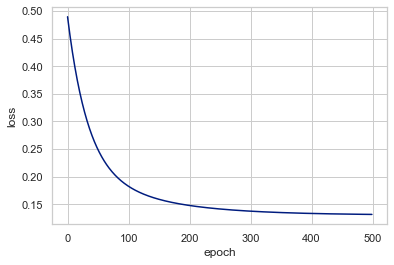

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context="notebook",style  = "whitegrid",palette = "dark")

ax = sns.lineplot(x = 'epoch',y='loss',data = pd.DataFrame({'loss':loss_data,'epoch':np.arange(epoch)}))
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()